In [1]:
!pip install tensorflow

In [1]:
import tensorflow as tf

/home/karthik/anaconda3/lib/python3.7/site-packages/scipy/__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.2)
  UserWarning)


In [2]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/home/karthik/Downloads/archive(1)/dataset/training_set'
valid_path = '/home/karthik/Downloads/archive(1)/dataset/test_set'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [5]:


# don't train existing weights
for layer in inception.layers:
    layer.trainable = False



In [6]:
from glob import glob
# useful for getting number of output classes
#folders = glob('Datasets/train/*')
#Downloads/archive(1)/dataset/training_set
folders = glob('/home/karthik/Downloads/archive(1)/dataset/training_set/*') 
#folders = glob('Downloads/archive(1)/dog vs cat/dataset/training_set/?')

folders

['/home/karthik/Downloads/archive(1)/dataset/training_set/dogs',
 '/home/karthik/Downloads/archive(1)/dataset/training_set/cats']

In [6]:
!pwd

/home/karthik/Downloads


In [14]:
import os
data_dir = 'Downloads/archive(1)/dataset/training_set'
print('Folders :', os.listdir(data_dir))

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/archive(1)/dataset/training_set'

In [15]:
tf.version

<module 'tensorflow._api.v2.version' from '/home/karthik/anaconda3/lib/python3.7/site-packages/tensorflow/_api/v2/version/__init__.py'>

In [3]:
folders

[]

In [7]:


# our layers - you can add more if you want
x = Flatten()(inception.output)



In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [11]:


# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [12]:


# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_path = '/home/karthik/Downloads/archive(1)/dataset/training_set'
valid_path = '/home/karthik/Downloads/archive(1)/dataset/test_set'

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/home/karthik/Downloads/archive(1)/dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8000 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/home/karthik/Downloads/archive(1)/dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [15]:


# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
250/250 [==============================] - 838s 3s/step - loss: 0.4652 - accuracy: 0.9682 - val_loss: 0.3106 - val_accuracy: 0.9845
Epoch 2/10
250/250 [==============================] - 870s 3s/step - loss: 0.4587 - accuracy: 0.9778 - val_loss: 0.9015 - val_accuracy: 0.9715
Epoch 3/10
250/250 [==============================] - 874s 3s/step - loss: 0.3426 - accuracy: 0.9839 - val_loss: 0.3776 - val_accuracy: 0.9850
Epoch 4/10
250/250 [==============================] - 909s 4s/step - loss: 0.3615 - accuracy: 0.9872 - val_loss: 0.4525 - val_accuracy: 0.9860
Epoch 5/10
250/250 [==============================] - 841s 3s/step - loss: 0.3894 - accuracy: 0.9874 - val_loss: 0.4271 - val_accuracy: 0.9860
Epoch 6/10
250/250 [==============================] - 827s 3s/step - loss: 0.2097 - accuracy: 0.9914 - val_loss: 0.4474 - val_accuracy: 0.9900
Epoch 7/10
250/250 [==============================] - 783s 3s/step

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [17]:
y_pred = model.predict(test_set)

In [18]:
y_pred

array([[0.000000e+00, 1.000000e+00],
       [5.412582e-34, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       ...,
       [0.000000e+00, 1.000000e+00],
       [0.000000e+00, 1.000000e+00],
       [1.000000e+00, 0.000000e+00]], dtype=float32)

In [19]:


import numpy as np
y_pred = np.argmax(y_pred, axis=1)



In [20]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

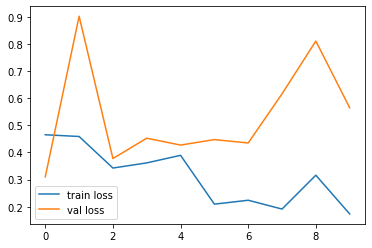

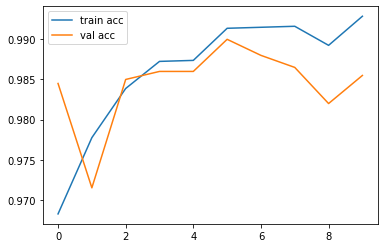

<Figure size 432x288 with 0 Axes>

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')